# 1 - Introdução

Mais um projeto prático de aprendizado de máquina, aparentemente, teremos que criar um modelo que possa prever, de acordo com alguns dados, se uma certa transação é fraudulenta ou não.

A base de dados usadas nesse notebook foi retirada do [Kaggle](https://www.kaggle.com/datasets/sanskar457/fraud-transaction-detection), e afim de aprimorar minhas habilidades em ciência de dados e aprendizado de máquina, foi fazer um projeto completo tendo como base ela.

Vamos analisar!

## 1-1 Primeiras Impressões

Vamos importar a base de dados e visualizar seus dados iniciais

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/jds/Documentos/data/final_transactions.csv', sep=',').iloc[:, 1:]

In [3]:
df

,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,0,2023-01-01 00:00:31,596,3156,533.07,31,0,0,0
1,1,2023-01-01 00:02:10,4961,3412,808.56,130,0,0,0
2,2,2023-01-01 00:07:56,2,1365,1442.94,476,0,1,1
3,3,2023-01-01 00:09:29,4128,8737,620.65,569,0,0,0
4,4,2023-01-01 00:10:34,927,9906,490.66,634,0,0,0
...,...,...,...,...,...,...,...,...,...
1754150,1754150,2023-07-02 23:56:36,161,655,531.43,15810996,182,0,0
1754151,1754151,2023-07-02 23:57:38,4342,6181,10.40,15811058,182,0,0
1754152,1754152,2023-07-02 23:58:21,618,1502,26.62,15811101,182,0,0
1754153,1754153,2023-07-02 23:59:52,4056,3067,550.43,15811192,182,0,0


Como temos 1.754.155 observações, é razoável considerar que teremos uma base boa para treinar nosso modelo, porém, vamos visualizar mais algumas distribuições

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TRANSACTION_ID     int64  
 1   TX_DATETIME        object 
 2   CUSTOMER_ID        int64  
 3   TERMINAL_ID        int64  
 4   TX_AMOUNT          float64
 5   TX_TIME_SECONDS    int64  
 6   TX_TIME_DAYS       int64  
 7   TX_FRAUD           int64  
 8   TX_FRAUD_SCENARIO  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 120.4+ MB


**Considerações iniciais**
- Temos em grande parte do dataset, valores de natureza contínua, isso possivelmente ajudará nosso modelo
- Há inconsistências nos tipos das variáveis, como na coluna "TX_DATETIME" que deveria ser um "datetime" está como "object"

## 1.2 - Tratando dados

Afim de corrigir possíveis erros e formatar para melhor visualização, valos tratar os dados

In [5]:
df.isna().sum()

TRANSACTION_ID       0
TX_DATETIME          0
CUSTOMER_ID          0
TERMINAL_ID          0
TX_AMOUNT            0
TX_TIME_SECONDS      0
TX_TIME_DAYS         0
TX_FRAUD             0
TX_FRAUD_SCENARIO    0
dtype: int64

Text(0.5, 1.0, 'Total de dados nulos')

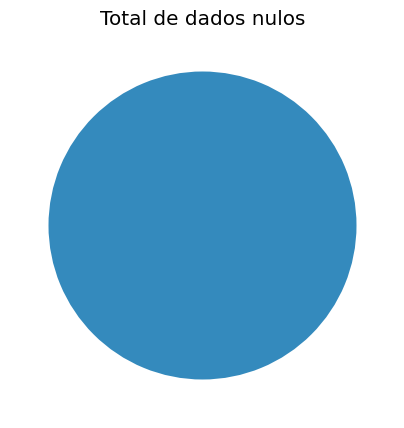

In [6]:
missing_values = df.isna().sum().sum()

plt.figure(figsize=(5, 5))

plt.style.use('ggplot')

plt.pie(x=[missing_values, df.shape[0]])

plt.title('Total de dados nulos')

**Observações sobre dados nulos**
- Aparentemente não temos dados propriamente nulos na nossa base de dados, porém, veremos melhor mais a frente

In [12]:
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

In [17]:
df['TX_YEAR'] = df['TX_DATETIME'].dt.year
df['TX_MONTH'] = df['TX_DATETIME'].dt.month
df['TX_DAY'] = df['TX_DATETIME'].dt.day

In [21]:
df.drop(['TX_DATETIME'], axis=1, inplace=True)

## 2 - Análise exploratória de dados

Chegou a hora de fazer uma exploração e visualizar nossa base de dados

## 2.1 - Distribuição de frequência

Text(0.5, 1.0, 'Distribuição de frequência')

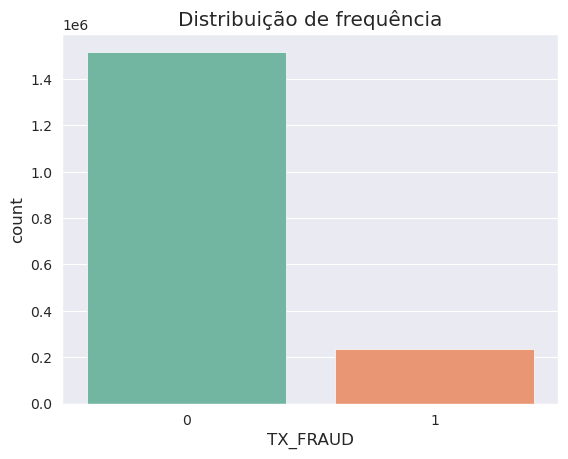

In [18]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

_ = sns.countplot(x='TX_FRAUD', data=df)
_.set_title('Distribuição de frequência')

É aparente como, na nossa base de dados, a distribuição de frequência é desbalanceada, uma vez que 

<AxesSubplot:>

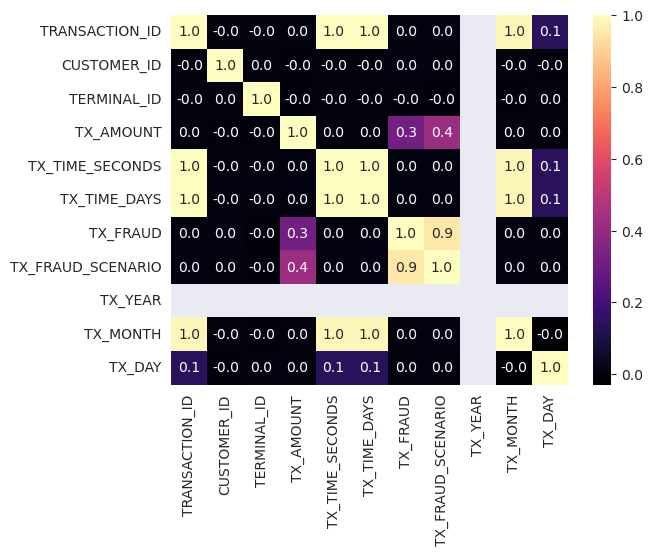

In [30]:
sns.heatmap(df.corr(), fmt='.1f', annot=True, cmap='magma')

Não há correlações significativas nos nossos dados, oque indica que não podemos fazer uma diminuição de dimensionalidade direta

# 3 - Implementando aprendizado de máquina

Chegou a hora de lidar com o aprendizado de máquina na nossa base de dados para classificação

## 3.1 - Separando dados entre treino e teste 

In [37]:
from sklearn.model_selection import train_test_split

x = df.drop(['TX_FRAUD', 'TX_FRAUD_SCENARIO', 'TRANSACTION_ID', 'CUSTOMER_ID'], axis=1)
y = df['TX_FRAUD']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

## 3.2 - Usando a árvore de decisão

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

In [44]:
def calculate_accuracy(model):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [45]:
calculate_accuracy(DummyClassifier())

0.8654806071979915

In [46]:
calculate_accuracy(DecisionTreeClassifier())

0.9987503962019342

In [47]:
calculate_accuracy(LogisticRegression())

0.9940028138888446

In [48]:
calculate_accuracy(KNeighborsClassifier())

0.909864345018345

# 4 - Conclusão

DecisionTreeClassifier foi o modelo com melhor acurácia